# Chapter 10: Object-Oriented Programming

10. 2 ***(Car Class with Read-Only Properties)*** Write a class Car that contains the model,
year (of manufacture), and speed of a car as hidden attributes (name these attributes with
a leading underscore). Provide the necessary read-only properties. Write two methods to
drive the car faster and slower. Test your Car class.

In [2]:
# Exercise 10.2: Car Class with Read-Only Properties 
class Car:
    """Car Class"""
    
    def __init__(self, model:str, year:int, speed:int):
        """Initialize a Card with model, year, and speed.
        
        >>> car1 = Car("BMW", 2023, 300)
        >>> car1.model
        'BMW'
        >>> car1.speed
        300
        >>> car1.accelerator(400)
        Traceback (most recent call last):
            ...
        ValueError: 300 is the maximum speed for this car.
        """

        self._model = model
        self._year = year
        self._speed = speed
        self._velocity = 0 
        
    @property
    def model(self) -> str: return self._model

    @property
    def year(self) -> int: return self._year

    @property
    def speed(self) -> int: return self._speed
    
    @property
    def velocity(self) -> int: return self._velocity

    def accelerator(self, velocity:int) -> None:
        
        if 0 < velocity < self.speed:
            self._velocity = velocity
            
        else:
            if velocity > self.speed :
                raise ValueError(f"{self.speed} is the maximum speed for this car.")
            
            else:
                raise ValueError("Velocity must be greater than 0")
            
    
    def brake(self, velocity:int) -> None:
        
        if 0 <= velocity < self.velocity :
            self._velocity = velocity
            
        else:
            raise ValueError(f"Velocity must be greater than or equal to 0 and less {self.velocity}")

    def __repr__(self) -> str:
        
        return(f"Model: {self.model}\n" 
              + f"Year: {self.year}\n"
              + f"Speed: {self.speed}")
        
if __name__ == '__main__':
    import doctest
    doctest.testmod(verbose=True)


Trying:
    car1 = Car("BMW", 2023, 300)
Expecting nothing
ok
Trying:
    car1.model
Expecting:
    'BMW'
ok
Trying:
    car1.speed
Expecting:
    300
ok
Trying:
    car1.accelerator(400)
Expecting:
    Traceback (most recent call last):
        ...
    ValueError: 300 is the maximum speed for this car.
ok
Trying:
    wake_up = Time(hour=6, minute=30)
Expecting nothing
ok
Trying:
    wake_up
Expecting:
    Time(hour=6, minute=30, second=0)
ok
Trying:
    print(wake_up)
Expecting:
    6:30:00 AM
ok
Trying:
    wake_up.hour
Expecting:
    6
ok
Trying:
    wake_up.set_time(hour=7, minute=45)
Expecting nothing
ok
Trying:
    wake_up
Expecting:
    Time(hour=7, minute=45, second=0)
ok
Trying:
    wake_up.hour = 6
Expecting nothing
ok
Trying:
    wake_up
Expecting:
    Time(hour=6, minute=45, second=0)
ok
Trying:
    wake_up.hour = 100
Expecting:
    Traceback (most recent call last):
        ...
    ValueError: Hour (100) must be 0-23
ok
16 items had no tests:
    __main__
    __main__.Car


10. 3 ***(Coin Class)*** Write a *Coin* Class to keep track of the number of 2 euro, 1 euro,
50 euro cent, 20 euro cent, 10 euro cent and 1 euro cent coins in a wallet. Provide a read-only property
*universal_str* that returns a string with the number of coins for each coin type. Write a
second method that returns the total amount of money. Keep your attributes hidden and
use the read-only properties. Create a *coin* object and test the methods.

In [3]:
# Exercise 10.3: Coin Class 
class Coin:
    """Coin Class"""
    
    def __init__(self, amount: float) -> None:
        """Initialise a wallet with coins of 2 euros, 
           1 euro, 50 euro cents, 20 euro cents, 10 euro cents and 1 euro cent.
        
        >>> wallet1 = Coin(123.89)
        >>> wallet1.total
        123.89
        """
        
        self._2euros = int(amount) // 2
        self._1euros = int(amount) % 2
        
        cents = list()
        amount = (amount * 100) % 100 # Gets only the decimal part of the number.
        
        for divisor in [50, 20, 10, 1]:
            cents.append(int(amount // divisor))
            amount %= divisor 
            
        self._50cents, self._20cents, self._10cents, self._1cents = cents # unpack the cents 
        
    @property
    def total(self) -> float:
        """Return the total"""
        coins = (self._2euros * 2) + self._1euros
        cents = sum((self._50cents *50, self._20cents *20, self._10cents *10, self._1cents)) / 100
        return  coins + cents
    
    def __repr__(self) -> str:
        """Return Coin Class representation"""
        return (f"{'Coins':>5} \t {'Amount':>12}\n"
                
                + f"\u20AC 2 \t {self._2euros:>12}\n"
                + f"\u20AC 1 \t {self._1euros:>12}\n\n"
                
                + f"{'Cents':>5} \t {'Amount':>12}\n"
                
                + f"\u00A2 50 \t {self._50cents:>12}\n"
                + f"\u00A2 20 \t {self._20cents:>12}\n"
                + f"\u00A2 10 \t {self._10cents:>12}\n"
                + f"\u00A2 1 \t {self._1cents:>12}")
        
        
if __name__ == '__main__':
    import doctest
    doctest.testmod()
    
wallet1 = Coin(123.89)
wallet1

Coins 	       Amount
€ 2 	           61
€ 1 	            1

Cents 	       Amount
¢ 50 	            1
¢ 20 	            1
¢ 10 	            1
¢ 1 	            9

10. 4 ***(Modifying the Internal Data Representation of a Class)*** Section 10.4.2's Time class represents the time as three integer values. Modify the class to store the time as the total number of seconds since midnight. Replace the *_hour*, *_minute* and *_second* attributes with one *_total_seconds* attribute. Modify the bodies of the *hour*, *minute* and *second* properties' methods to get and set *_total_seconds*. Re-execute Section 10.4's IPython session using the modified Time class to show that the updated class Time is interchangeable with the original one.

In [11]:
# Exercise 10.4: Modifying the Internal Data Representation of a Class
class Time:
    """Class Time with read-write properties."""

    def __init__(self, hour=0, minute=0, second=0):
        """Initialize each attribute.
        
        >>> wake_up = Time(hour=6, minute=30)
        >>> wake_up
        Time(hour=6, minute=30, second=0)
        
        >>> print(wake_up)
        6:30:00 AM
        
        >>> wake_up.hour
        6
        
        >>> wake_up.set_time(hour=7, minute=45)
        >>> wake_up
        Time(hour=7, minute=45, second=0)
        
        >>> wake_up.hour = 6
        >>> wake_up
        Time(hour=6, minute=45, second=0)
        
        Attempting to Set an Invalid Value
        
        >>> wake_up.hour = 100
        Traceback (most recent call last):
            ...
        ValueError: Hour (100) must be 0-23
        """
        
        self._total_seconds = 0
        self.hour = hour  # 0-23
        self.minute = minute  # 0-59
        self.second = second  # 0-59
       
    @property
    def hour(self):
        """Return the hour."""
        return self._total_seconds // 3600

    @hour.setter
    def hour(self, hour):
        """Set the hour."""
        if not (0 <= hour < 24):
            raise ValueError(f'Hour ({hour}) must be 0-23')

        if self.hour != 0:
            self._total_seconds -= (self.hour * 3600)
            
        self._total_seconds += hour * 3600

    @property
    def minute(self):
        """Return the minute."""
        return (self._total_seconds - (self.hour * 3600)) // 60

    @minute.setter
    def minute(self, minute):
        """Set the minute."""
        if not (0 <= minute < 60):
            raise ValueError(f'Minute ({minute}) must be 0-59')

        if self.minute != 0:
            self._total_seconds -= self.minute * 60
            
        self._total_seconds += minute * 60

    @property
    def second(self):
        """Return the second."""
        return (self._total_seconds - (self.hour * 3600)) % 60

    @second.setter
    def second(self, second):
        """Set the second."""
        if not (0 <= second < 60):
            raise ValueError(f'Second ({second}) must be 0-59')

        if self.second != 0:
            self._total_seconds -= self.second
            
        self._total_seconds += second

    def set_time(self, hour=0, minute=0, second=0):
        """Set values of hour, minute, and second."""
        self.hour = hour
        self.minute = minute
        self.second = second

    def __repr__(self):
        """Return Time string for repr()."""
        return (f'Time(hour={self.hour}, minute={self.minute}, ' + 
                f'second={self.second})')

    def __str__(self):
        """Return Time string in 12-hour clock format."""
        return (('12' if self.hour in (0, 12) else str(self.hour % 12)) + 
                f':{self.minute:0>2}:{self.second:0>2}' + 
                (' AM' if self.hour < 12 else ' PM'))
            
            

if __name__ == '__main__':
    import doctest
    doctest.testmod()



10. 5 ***(Duck Typing)*** Recall that with duck typing, objects of unrelated classes can respond to the same method calls if they implement those methods. In Section 10.8, you created a list containing a *CommissionEmployee* and a *SalariedCommissionEmployee*. Then, you iterated through it, displaying each employee’s string representation and earnings. Create a class *SalariedEmployee* for an employee that gets paid a fixed weekly salary. Do not inherit from *CommissionEmployee* or *SalariedCommissionEmployee*. In class *SalariedEmployee* override method *\_\_repr\_\_* and provide an earnings method. Demonstrate duck typing by creating an object of your class.

In [13]:
# Exercise 10.5: Duck Typing

from decimal import Decimal

class SalariedEmployee():
    """Class representing an employee who gets paid a weekly salary."""

    def __init__(self, first_name: str, last_name: str, ssn: int, 
                 weekly_salary: Decimal, commission_rate: Decimal):
        
        """Initialize SalariedEmployee attributes."""

        self._first_name = first_name
        self._last_name = last_name
        self._ssn = ssn
        self.weekly_salary = weekly_salary
        self.commission_rate = commission_rate 
    
    @property
    def first_name(self) -> str: return self._first_name

    @property
    def last_name(self) -> str: return self._last_name

    @property
    def ssn(self) -> Decimal: return self._ssn
    
    @property
    def weekly_salary(self) -> Decimal: return self._weekly_salary
    

    @weekly_salary.setter
    def weekly_salary(self, salary: Decimal) -> None:
        """Set weekly_salary or raise ValueError if invalid."""
        if salary < Decimal('0.0'):
            raise ValueError('salary worked must be >= 0.0')
        
        self._weekly_salary = salary
        
    @property
    def commission_rate(self) -> Decimal: return self._commission_rate
    
    @commission_rate.setter
    def commission_rate(self, rate: Decimal) -> None:
        """Set commission rate or raise ValueError if invalid."""
        
        if not (Decimal('0.0') < rate < Decimal('1.0')):
            raise ValueError('Interest rate must be greater than 0 and less than 1')
        
        self._commission_rate = rate
        
        
    def earnings(self) -> Decimal:
        """Calculate earnings."""
        return self.weekly_salary * self.commission_rate

    def __repr__(self) -> str:
        """Return string representation for repr()."""
        return ('SalariedEmployee: '
                + f'{self.first_name} {self.last_name}\n' 
                + f'social security number: {self.ssn}\n'  
                + f'weekly salary: {self.weekly_salary:,.2f}\n'
                + f'commission rate: {self.commission_rate:.2f}')

class WellPaidDuck:
    def __repr__(self):
        return 'I am a well-paid duck'
    def earnings(self) -> Decimal:
        return Decimal('1_000_000.00')

employee = SalariedEmployee( 'Marco', 'Pettri', '666-33-9999', 4166.5, 0.05)
duck = WellPaidDuck()


for employees in (employee, duck):
    print(employees)
    print(f'earnings: {employees.earnings():,.2f}\n')

SalariedEmployee: Marco Pettri
social security number: 666-33-9999
weekly salary: 4,166.50
commission rate: 0.05
earnings: 208.33

I am a well-paid duck
earnings: 1,000,000.00



10. 6 ***(Calculating Vector Lengths)*** A vector is an object that has a magnitude and a direction. A vector is represented as a line segment with an arrow where the arrow represents the direction and the length of the vector is the magnitude. A vector can also be a single
point with *x-* and *y-*coordinates. The magnitude calculated from this type of vector equals the distance between the origin of the cartesian coordinate system and the point. Write a class *Point* that represents an *(x-y)* coordinate pair and provides *x* and *y* read-write properties as well as a method to calculate the distance between the point and the origin of the coordinate system. Include *\_\_init\_\_* and *\_\_repr\_\_* methods. Write a class *Vector* that has two Point objects as its attributes. Include *\_\_init\_\_* and *\_\_repr\_\_* methods and a method that can calculate the magnitude of the vector. Test your *Point* and your *Vector* class.

In [1]:
# Exercise 10.6 : Calculating Vector Lengths
class Point:
    """Point Class representing a pair of coordinates (x-y)"""
    
    def __init__(self, x: float | int, 
                 y: float | int) -> None :
        """Initialise the x-y coordinates
        
        >>> point = Point(5, 1)
        >>> point
        (5, 1)
        """
        
        self.set_x = x
        self.set_y = y
        
    @property
    def get_x(self) -> int | float:
        """Return x-coordinate
        
        >>> point = Point(5, 1)
        >>> point.get_x
        5
        """
        return self._x
    
    @get_x.setter
    def set_x(self, point: int | float) -> None:
        """set x-coordinate
        
        >>> point = Point(5, 1)
        
        Attempting to Set an Invalid Value
        
        >>> point.set_x = 'a'
        Traceback (most recent call last):
            ...
        TypeError: x-coordinate must be float or int, not <class 'str'>
        """
        
        if not isinstance(point, int | float):
            raise TypeError(f"x-coordinate must be float or int, not {type(point)}")
        
        self._x = point
        
    @property
    def get_y(self) -> int | float:
        """Return y-coordinate 
        
        >>> point = Point(5, 1)
        >>> point.get_y
        1
        """
        return self._y
    
    @get_y.setter
    def set_y(self, point: int | float) -> None:
        """set y-coordinate
        
        >>> point = Point(5, 1)
        
        Attempting to Set an Invalid Value
        
        >>> point.set_y = '2'
        Traceback (most recent call last):
            ...
        TypeError: x-coordinate must be float or int, not <class 'str'>
        """
        if not isinstance(point, int | float):
            raise TypeError(f"y-coordinate must be float or int, not {type(point)}")
        
        self._y = point
        
    def get_distance(self) -> float:
        """Return the the distance between 
            the point and the origin of the coordinate system
        
        >>> point = Point(5, 1)
        >>> point.get_distance()
        5.099
        """
        return round(abs(pow(self.get_x, 2) + pow(self.get_y, 2)) ** 0.5, 3) # 0.5 = 1/2 = square root  
    
    def __repr__(self) -> str:
        return f"({self.get_x}, {self.get_y})"
    
class Vector():
    """Vector Class representing a vector with two 'Point' objects."""
    
    def __init__(self, points1: Point | list | tuple,
                 points2: Point | list | tuple) -> None:
        """Initialise the vector
        
        >>> vect = Vector(Point(5, 1), [1, 2])
        >>> vect
        A = <5, 1>
        B = <1, 2>
        """
        self.firstCoordinate = points1
        self.secondCoordinate = points2
        
    @property
    def firstCoordinate(self) -> Point:
        """Return the first pair of coordinates 
        
        >>> vect = Vector(Point(5, 1), [1, 2])
        >>> vect.firstCoordinate
        (5, 1)
        """
        return self._points1
    
    @firstCoordinate.setter
    def firstCoordinate(self, points:  Point | list | tuple) -> None:
        """Set the first pair of coordinates 
        
        
        >>> vect = Vector(Point(5, 1), [1, 2])
        
        Attempting to Set an Invalid Value
        >>> vect.firstCoordinate = 2.2
        Traceback (most recent call last):
            ...
        TypeError: <class 'float'> object is not iterable or Point type
        """
        if isinstance(points, Point) or hasattr(points, '__iter__'):
        
            self._points1 = Point(points[0], points[1]) if hasattr(points, '__iter__') else points
            
        else:
            raise TypeError(f"{type(points)} object is not iterable or Point type")
        
    @property
    def secondCoordinate(self) -> Point:
        """Return the second pair of coordinates
        
        >>> vect = Vector(Point(5, 1), [1, 2])
        >>> vect.secondCoordinate
        (1, 2)
        """
        return self._points2
    
    @secondCoordinate.setter
    def secondCoordinate(self, points:  Point | list | tuple) -> None:
        """Set the second pair of coordinates
        
        >>> vect = Vector(Point(5, 1), [1, 2])
        
        Attempting to Set an Invalid Value
        >>> vect.secondCoordinate = 2.2
        Traceback (most recent call last):
            ...
        TypeError: <class 'float'> object is not iterable or Point type
        """
        
        if isinstance(points, Point) or hasattr(points, '__iter__'):
        
            self._points2 = Point(points[0], points[1]) if hasattr(points, '__iter__') else points
            
        else:
            raise TypeError(f"'{type(points)}' object is not iterable or Point type")
    
    def calculate_magnitude(self) -> float:
        """Return the magnitude of the vector
        
        >>> vect = Vector((5, 1), [1, 2])
        >>> vect.calculate_magnitude()
        4.123
        """
        magnitude = pow(self._points2.get_x  -  self._points1.get_x, 2) \
                    + pow(self._points2.get_y  -  self._points1.get_y, 2)
        
        return round(abs(magnitude) ** 0.5, 3)
            
            
    def __repr__(self) -> str:
        return (f"A = <{self._points1.get_x}, {self._points1.get_y}>\n"
                + f"B = <{self._points2.get_x}, {self._points2.get_y}>")
        

if __name__ == '__main__':
    import doctest
    doctest.testmod()

10. 7 ***(Manipulating Dates and Times with Module datetime)*** The Python Standard Library's **datetime** module contains a **datetime** class for manipulating dates and times. The class provides various overloaded operators. Research class *datetime's* capabilities, then perform the following tasks:
- a) Get the current date and time and store it in variable **x**.
- b) Repeat Part *(a)* and store the result in variable **y**.
- c) Display each *datetime* object.
- d) Display each *datetime* object’s data attributes individually.
- e) Use the comparison operators to compare the two *datetime* objects.
- f) Calculate the difference between *y* and *x*.

In [6]:
#Exercise 10.7 : Manipulating Dates and Times with Module datetime
from datetime import date, datetime

x = datetime(2012, 12, 12, 18, 39, 55)
y = datetime(1997, 11, 8, 22, 15, 33)
                
print("C)")           
print(f"x = {x} \ny = {y}\n")

print("D)")   
print(f"Date Attributes\n \tYear: {x.year}, Month: {x.month}, Day: {x.day}")
print(f"Time Attributes\n \tHour: {x.hour}, Minute: {x.minute}, Second: {x.second}\n")

print("E)")   
for operators in '<, >, ==, !='.split(','):
    print(f'x {operators:^5} y: ', eval(f'x {operators} y'))

print("\nF)")   
print(f"x - y = ", x - y )

C)
x = 2012-12-12 18:39:55 
y = 1997-11-08 22:15:33

D)
Date Attributes
 	Year: 2012, Month: 12, Day: 12
Time Attributes
 	Hour: 18, Minute: 39, Second: 55

E)
x   <   y:  False
x   >   y:  True
x   ==  y:  False
x   !=  y:  True

F)
x - y =  5512 days, 20:24:22


10. 8 ***(Converting Data Class Objects to Tuples and Dictionaries)*** In some cases, you might want to treat data class objects as tuples or dictionaries. The *dataclasses* module provides functions *astuple* and *asdict* for this purpose. Research these functions, then create an object of this chapter's *Card* data class and use these functions to convert the *Card* to a tuple and a dictionary. Display the results.


In [7]:
# Exercise 10.8: Converting Data Class Objects to Tuples and Dictionaries 
from dataclasses import dataclass, asdict, astuple
from typing import ClassVar, List

@dataclass
class Card:
    FACES: ClassVar[List[str]] = ['Ace', '2', '3', '4', '5', '6', '7', 
                                  '8', '9', '10', 'Jack', 'Queen', 'King']
    SUITS: ClassVar[List[str]] = ['Hearts', 'Diamonds', 'Clubs', 'Spades']

    face: str
    suit: str

    @property
    def image_name(self) -> str:
        """Return the Card's image file name."""
        return str(self).replace(' ', '_') + '.png'

    def __str__(self) -> str:
        """Return string representation for str()."""
        return f'{self.face} of {self.suit}'
    
    def __format__(self, format) -> str:
        """Return formatted string representation."""
        return f'{str(self):{format}}'
        

card = Card('Ace', 'Spades')

print(card)
print(repr(card))
print(astuple(card))
print(asdict(card))

Ace of Spades
Card(face='Ace', suit='Spades')
('Ace', 'Spades')
{'face': 'Ace', 'suit': 'Spades'}


10. 9 ***(Calculator Class)*** Write a class that implements a *Calculator*. The class should
contain 2 numbers. Provide an *\_\_init\_\_* method that takes the 2 numbers as arguments.
Also, provide the following read-only properties:

- a) *sum* returns the sum of the 2 numbers
- b) *difference* returns the difference between the 2 numbers
- c) *product* returns the product between the 2 numbers
- d) *division* returns the quotient of number1 divided by number2

These properties should not have corresponding data attributes; rather, they should use
side in calculations that return the desired values. Create a Calculator object and display its properties.

In [8]:
# Exercise 10.9: Calculator Class
class Calculator:
    """Simulates a simple calculator 
    with two operands and the four basic operations."""
    
    def __init__(self, numero1, numero2) -> None:
        """Initialise operands"""
        self.left_operand = numero1
        self.right_operand = numero2
        
    @property
    def left_operand(self) -> int | float: return self.__left_operand
    
    @property
    def right_operand(self) -> int | float: return self.__right_operand
    
    @left_operand.setter
    def left_operand(self, number) -> None:
        """Set left operand"""
        
        if isinstance(number, int | float):
            self.__left_operand = number
        else:
            raise ValueError(f"The number must be int or float not {type(number)}")
    
    @right_operand.setter
    def right_operand(self, number) -> None:
        """Set right operand"""
        
        if isinstance(number, int | float):
            self.__right_operand = number
        else:
            raise ValueError(f"The number must be int or float not {type(number)}")
    
    @property
    def sum(self) -> int | float: return self.left_operand + self.right_operand
    
    @property
    def difference(self) -> int | float : return self.left_operand - self.right_operand
    
    @property
    def product(self) -> int | float : return self.left_operand * self.right_operand
    
    @property
    def division(self) -> int | float :return round(self.left_operand / self.right_operand, 3)
    
    def __repr__(self) -> str:
        return (f"Left  operand: {self.left_operand:<3,}\n"
                + f"Right operand: {self.right_operand:<3,}")
        
        
test = Calculator(33, 89.2)

print(test, end='\n\n')
print(f"{test.left_operand} + {test.right_operand} =", test.sum)
print(f"{test.left_operand} - {test.right_operand} =", test.difference)
print(f"{test.left_operand} * {test.right_operand} =", test.product)
print(f"{test.left_operand} / {test.right_operand} =", test.division)

Left  operand: 33 
Right operand: 89.2

33 + 89.2 = 122.2
33 - 89.2 = -56.2
33 * 89.2 = 2943.6
33 / 89.2 = 0.37


10. 10 ***(Player Class)*** Write a class called *Player* that can be used in a turn-based strategy game to create player objects. Create the following data attributes-the *name* (a string), *level* (an int), *strength* (an int), and *Health Points* (a Decimal). The class should have an *\_\_init\_\_* method to initialize the data attributes. Provide a property for each data attribute. Use validation in the properties of the level and health attribute to ensure that they remain non-negative. Provide a *defence* method to defend from an attack. The intensity of the attack is calculated as follows—divide the strength of the attacker by a random number between 1 and 3, subtract from this result the strength of our player multiplied with the level of our player. If the intensity is $\le 0$, the player loses, and the intensity is subtracted from the health points of the player.

In [3]:
# Exercise 10.10: Player Class
from random import randrange

class Player:
    """Player class"""
    
    def __init__(self, name: str, level: int, 
                 strength: int, health_points: float) -> None:
        """initialises attributes\\
        player1 = Player(name, level, strength, health Points)
        
        >>> player = Player('nve', 2, 60, 100)
        >>> player.name
        'nve'
        >>> player.level
        2
        >>> player.strength 
        60
        >>> player.health
        100.0
        """
        self.__Name = name
        self.__Strength  = strength
        self.level = level
        self.health = health_points
        
    @property
    def name(self) -> str: return self.__Name
    
    @property
    def strength(self) -> int: return self.__Strength
    
    @property
    def level(self) -> int: return self.__Level
    
    @property
    def health(self) -> float: return round(self.__Health, 2)
    
    @level.setter
    def level(self, lvl) -> None:
        """Set level
        
        >>> player = Player('nve', 2, 60 , 100)
        
        Attempting to Set an Invalid Value
        >>> player.level = -10
        Traceback (most recent call last):
            ...
        Exception: The level must be an int or a float and greater than or equal to zero
        """
        
        if isinstance(lvl, int | float) and lvl >= 0:
            self.__Level = int(lvl)
            
        else: 
            raise Exception("The level must be an int or a float and greater than or equal to zero")
        
    @health.setter
    def health(self, hlth) -> None:
        """Set health Points
        >>> player = Player('nve', 2, 60, 100)
        
        Attempting to Set an Invalid Value
        >>> player.health = '9.5'
        Traceback (most recent call last)
            ...
        Exception: The health point must be a float or an int and greater than or equal to zero
        """
        
        if isinstance(hlth, float | int ) and  hlth >= 0:
            self.__Health = float(hlth)
            
        else:
            raise Exception("The health point must be a float or an int and greater than or equal to zero")
        
    def defence(self, attacker) -> None:
        """Receives an attacker of type 'Player' and calculates the intensity of the attack, 
            If the intensity is <= 0, the player loses, and the intensity is subtracted
            from the health points of the player
            
            >>> from random import seed 
            >>> seed(0)
            >>> player1 = Player('nve', 2, 60, 100)
            >>> player2 = Player('ultra', 12, 400, 66)
            >>> player1.defence(player2)
            >>> player1.health
            20.0
            """
            
        intensity =   (self.strength * self.level) - (attacker.strength  / randrange(1, 4) )

        if 0 >= intensity:
            self.health -= abs(intensity)
    
    def __repr__(self) -> str:
        """
        >>> player = Player('nve', 2, 60, 100)
        >>> player
        Name: nve
        Level: 2
        Strength: 60
        Health Points: 100.00
        """
        
        return (f"Name: {self.name}\n"
                f"Level: {self.level:,}\n"
                f"Strength: {self.strength:,}\n"
                f"Health Points: {self.health:.2f}")
        

if __name__ == '__main__':
    import doctest
    
    doctest.testmod()

10. 11 ***(Class Fraction)*** The Python Standard Library module *fractions* provides a *Fraction* class that stores the numerator and denominator of a fraction, such as: $\frac{2}{4}$

Research *Fraction's* capabilities, then demonstrate:

- a) Printing *Fractions* in the form *a/b*, where *a* is the numerator and *b* is the denominator.
- b) Adding two *Fractions*.
- c) Subtracting two *Fractions*.
- d) Multiplying two *Fractions*.
- e) Dividing two *Fractions*.
- f) Converting *Fractions* to floating-point numbers with built-in function *float*

In [1]:
# Exercise 10.11: Class Fraction

from fractions import Fraction

left_operand = Fraction(26, 15)
right_operand = Fraction(25, 19)

print(f"First  Fraction: {left_operand}\n"
      + f"Second Fraction: {right_operand}\n")

for operators, symbols in zip('+-*/', '\u002B\u002D\u00D7\u00F7'): 

    print(f"{left_operand} {symbols:^3} {right_operand} = " ,
          eval(f'left_operand {operators} right_operand'))


print(f"\n{left_operand} \u2208 \u211A = {float(left_operand):.2f} \u2208 \u211D")
print(f"{right_operand} \u2208 \u211A = {float(right_operand):.2f} \u2208 \u211D")

First  Fraction: 26/15
Second Fraction: 25/19

26/15  +  25/19 =  869/285
26/15  -  25/19 =  119/285
26/15  ×  25/19 =  130/57
26/15  ÷  25/19 =  494/375

26/15 ∈ ℚ = 1.73 ∈ ℝ
25/19 ∈ ℚ = 1.32 ∈ ℝ


10. 12 ***(Built-in Type complex)*** Python supports complex numbers with the built-in type
*complex*. Research *complex's* capabilities, then demonstrate:
- a) Adding two *complex* numbers.
- b) Subtracting two *complex* numbers.
- c) Printing *complex* numbers.
- d) Getting the real and imaginary parts of *complex* numbers.

In [2]:
# Exercise 10.12: Built-in Type complex

cmplx1 = 6 + 7j
cmplx2 = 1 + 4j

for cmplx in (cmplx1, cmplx2):
    
    print(f"Complex Number: {cmplx}")
    print(f"Real Part: {cmplx.real}")
    print(f"Imaginary Part: {cmplx.imag}\n")

print('\tBasic Operations\n')
for operators, symbols in zip('+-*/', '\u002B\u002D\u00D7\u00F7'): 

    print(f"{cmplx1} {symbols:^3} {cmplx2} = " ,
          eval(f'cmplx1 {operators} cmplx2'))

Complex Number: (6+7j)
Real Part: 6.0
Imaginary Part: 7.0

Complex Number: (1+4j)
Real Part: 1.0
Imaginary Part: 4.0

	Basic Operations

(6+7j)  +  (1+4j) =  (7+11j)
(6+7j)  -  (1+4j) =  (5+3j)
(6+7j)  ×  (1+4j) =  (-22+31j)
(6+7j)  ÷  (1+4j) =  (2-1j)


10. 13 ***(doctest)*** Create a script containing the following maximum function:
```py
def maximum(value1, value2, value3):
"""Return the maximum of three values."""

    max_value = value1
    if value2 > max_value:
        max_value = value2  

    if value3 > max_value:
        max_value = value3  

    return max_value

```
Modify the function's docstring to define tests for calling function *maximum* with three *ints*, three *floats* and three *strings*. For each type, provide three tests—one with the largest value as the first argument, one with the largest value as the second argument, one with the largest value as the third argument. Use *doctest* to run your tests and confirm that all execute correctly. Next, modify the *maximum* function to use *<* operators rather than *>* operators. Run your tests again to see which tests fail.

In [4]:
# Exercise 10.13 : doctest

def maximum(value1, value2, value3):
    """Return the maximum of three values.
    
    >>> integers = [89, 12, 55], [12, 89, 55], [55, 12, 89]
    >>> floats = [89.5, 12.5, 55.5], [12.5, 89.5, 55.5], [55.5, 12.5, 89.5]
    >>> chars = ['z','a', 'j'], ['a', 'z', 'j'], ['j', 'a', 'z']
    
    >>> list(map(maximum, *integers))
    [89, 89, 89]

    >>> list(map(maximum, *floats))
    [89.5, 89.5, 89.5]
    
    >>> list(map(maximum, *chars))
    ['z', 'z', 'z']

"""
    max_value = value1
    if value2 > max_value:
        max_value = value2  

    if value3 > max_value:
        max_value = value3  

    return max_value
 
def maximum_2(value1, value2, value3):

    """Return the maximum of three values.
    
    >>> integers = [89, 12, 55], [12, 89, 55], [55, 12, 89]
    >>> floats = [89.5, 12.5, 55.5], [12.5, 89.5, 55.5], [55.5, 12.5, 89.5]
    >>> chars = ['z','a', 'j'], ['a', 'z', 'j'], ['j', 'a', 'z']
    
    >>> list(map(maximum_2, *integers)) # Expected: [89, 89, 89], but obtained: [12, 12, 55]
    [12, 12, 55]
    

    >>> list(map(maximum_2, *floats)) # Expected: [89.5, 89.5, 89.5], but obtained: [12.5, 12.5, 55.5]
    [12.5, 12.5, 55.5]
    
    >>> list(map(maximum_2, *chars)) # Expected: ['z', 'z', 'z'], but obtained: ['a', 'a', 'j']
    ['a', 'a', 'j']
    """
    
    max_value = value1
    if value2 < max_value:
        max_value = value2  

    if value3 < max_value:
        max_value = value3  

    return max_value

if __name__ ==  '__main__':
    import doctest
    
    doctest.testmod()

10. 14 ***(Creating an Account Data Class Dynamically)*** The *dataclasses* module's
*make_dataclass* function creates a data class **dynamically** from a list of strings that represent the data class's attributes. Research function *make_dataclass*, then use it to generate an *Account* class from the following list of strings:
``` py 
        ['account', 'name', 'balance']
```

Create objects of the new *Account* class, then display their string representations and compare the objects with the *==* and *!=* operators.

In [5]:
# Exercise 10.14: Creating an Account Data Class Dynamically

from dataclasses import make_dataclass
from decimal import Decimal


Account = make_dataclass('Account', ['account', 'name', 'balance'])

account1 = Account( '50ED-60', 'John Green', Decimal('59.67'))
account2 = Account( '36FD-48', 'Suzuki Murial', Decimal('95.42'))

print(account1, account2, sep='\n')
print(f"Account1 == Account2:", account1 == account2)
print(f"Account1 != Account2:", account1 != account2)

Account(account='50ED-60', name='John Green', balance=Decimal('59.67'))
Account(account='36FD-48', name='Suzuki Murial', balance=Decimal('95.42'))
Account1 == Account2: False
Account1 != Account2: True


10. 15 ***(Immutable Data Class Objects)*** Built-in types *int*, *float*, *str* and *tuple* are immutable. Data classes can simulate immutability by designating that objects of the class
should be "frozen" after they're created. Client code cannot assign values to the attributes of
a frozen object. Research "frozen" data classes, then reimplement this chapter's "Complex" class
as a "frozen" data class. Show that you cannot modify a "Complex" object after you create it.

In [7]:
# Exercise 10.15: Immutable Data Class Objects
from dataclasses import dataclass

@dataclass(frozen=True)
class Complex:
    """Complex class that represents a complex number 
    with real and imaginary parts."""
    
    real: int 
    imaginary: int 

    def __add__(self, right):
        """Overrides the + operator."""
        return Complex(self.real + right.real, 
                       self.imaginary + right.imaginary)

    def __iadd__(self, right):
        """Overrides the += operator."""
        self.real += right.real
        self.imaginary += right.imaginary
        return self

    def __sub__(self, right):
        """Overrides the - operator."""
        return Complex(self.real - right.real, 
                       self.imaginary - right.imaginary)

    def __isub__(self, right):
        """Overrides the -= operator."""
        self.real -= right.real
        self.imaginary -= right.imaginary
        return self

    def __repr__(self):

        """Return string representation for repr()."""
        return (f'({self.real}' + 
                (' + ' if self.imaginary >= 0 else ' - ') +
                f'{abs(self.imaginary)}i)')



var1 = Complex(real=2, imaginary=4)
var2 = Complex(real=5, imaginary=-1)

print("var1 = {0}{1}var2 = {2}".format(var1, '\n', var2))

print(f"var1 + var2 = ", var1 + var2)

var1 += var2

var1 = (2 + 4i)
var2 = (5 - 1i)
var1 + var2 =  (7 + 3i)


FrozenInstanceError: cannot assign to field 'real'

10. 16 ***(Account Inheritance Hierarchy)*** Create an inheritance hierarchy that a bank might use to represent customer bank accounts. All customers at this bank can deposit money into their accounts and withdraw money from their accounts. More specific types of accounts also exist. Savings accounts, for instance, earn interest on the money they hold.\
Checking accounts, on the other hand, don't earn interest and charge a fee per transaction.\
&emsp; Start with class *Account* from this chapter and create two subclasses *SavingsAccount* and *CheckingAccount*. A *SavingsAccount* should also include a data attribute indicating the interest rate. A *SavingsAccount's* *calculate_interest* method should return the *Decimal* result of multiplying the interest rate by the account balance. *SavingsAccount* should inherit methods *deposit* and *withdraw* without redefining them.\
&emsp; A *CheckingAccount* should include a Decimal data attribute that represents the fee charged per transaction. Class *CheckingAccount* should override methods *deposit* and *withdraw* so that they subtract the fee from the account balance whenever either transaction is performed successfully *CheckingAccount's* versions of these methods should invoke the base-class *Account* versions to update the account balance *CheckingAccount's* *withdraw* method should charge a fee only if money is withdrawn (that is, the withdrawal amount does not exceed the account balance).\
&emsp; Create objects of each class and tests their methods. Add interest to the *SavingsAccount* object by invoking its *calculate_interest* method, then passing the returned interest amount to the object's *deposit* method.

In [6]:
# Exercise 10.16: Account Inheritance Hierarchy
from decimal import Decimal

class Account:
    """Account class for maintaining a bank account balance."""
    
    def __init__(self, name: str, balance: Decimal) -> None:
        """Initialise an Account object.
        
            Account(Name, Balance)

        >>> account1 = Account('John Green', Decimal('50.00'))
        >>> account1.name
        'John Green'
        >>> account1.balance
        Decimal('50.00')

        The balance argument must be greater than or equal to 0.
        >>> account2 = Account('John Green', Decimal('-50.00'))
        Traceback (most recent call last):
            ...
        ValueError: Initial balance must be >= to 0.00.
        """

        if balance < Decimal('0.00'):
            raise ValueError('Initial balance must be >= to 0.00.')

        self.name = name
        self.balance = balance

    def deposit(self, amount: Decimal) -> None:
        """Deposit money to the account.
        
        >>> account1 = Account('John Green', Decimal('50.00'))
        >>> account1.deposit(Decimal('10.55'))
        >>> account1.balance
        Decimal('60.55')
        
        >>> account1.deposit(Decimal('-100.00'))
        Traceback (most recent call last):
            ...
        ValueError: amount must be positive.
        """
        
        if amount < Decimal('0.00'):
            raise ValueError('amount must be positive.')

        self.balance += amount

    def withdraw(self, amount: Decimal) -> None:
        """Withdraw money from the account.
       
        >>> account1 = Account('John Green', Decimal('50.00'))
        >>> account1.withdraw(Decimal('10'))
        >>> account1.balance
        Decimal('40.00')
        
        >>> account1.withdraw(Decimal('60'))
        Traceback (most recent call last):
            ...
        ValueError: amount must be <= to balance.
        
        >>> account1.withdraw(Decimal('-10'))
        Traceback (most recent call last):
            ...
        ValueError: amount must be positive.
        """
        if amount > self.balance:
            raise ValueError('amount must be <= to balance.')
        elif amount < Decimal('0.00'):
            raise ValueError('amount must be positive.')

        self.balance -= amount



class SavingsAccount(Account):
    """Savings Account class"""
    
    def __init__(self, name: str, balance: Decimal, interestRate: Decimal):
        """Initialise a SavingsAccount object.
        
            SavingsAccount(Name, Balance, Interest Rate)
        
        The balance argument must be greater than or equal to 0
        
        >>> account1 = SavingsAccount('John Green', Decimal('50.00'), Decimal('0.75'))
        >>> account1.name
        'John Green'
        >>> account1.balance
        Decimal('50.00')
        """
        super().__init__(name, balance)
        self.interest_rate = interestRate

    @property
    def interest_rate(self) -> Decimal:
        """Return and Set the Interest Rate
        
        >>> account1 = SavingsAccount('John Green', Decimal('50.00'), Decimal('0.75'))
        >>> account1.interest_rate
        Decimal('0.75')
        
        >>> account1.interest_rate = Decimal('0.1')
        >>> account1.interest_rate
        Decimal('0.1')
        
        Attempting to Set an Invalid Value
        >>> account1.interest_rate = Decimal('10')
        Traceback (most recent call last):
            ...
        ValueError: Interest rate must be greater than 0 and less than 1.
        """
        return self.__interest_Rate 
    
    @interest_rate.setter
    def interest_rate(self, rate: Decimal) -> None:
        """Set the Interest Rate or raise ValueError if invalid """
        
        if not (Decimal('0.0') < rate < Decimal('1.0')):
            raise ValueError('Interest rate must be greater than 0 and less than 1.')

        self.__interest_Rate = rate
    
    def calculate_interest(self) -> Decimal:
        """Returns the interest.
        
        >>> account1 = SavingsAccount('John Green', Decimal('50.00'), Decimal('0.75'))
        >>> account1.calculate_interest()
        Decimal('37.5000')
        """
        return self.interest_rate * self.balance
        

class CheckingAccount(Account):
    """Checking Account Class"""
    
    def __init__(self, name: str, balance: Decimal, fee: Decimal) -> None:
        """Initialise a CheckingAccount object.
        
            CheckingAccount(Name, Balance, Fee)
            
        The balance argument must be greater than or equal to 0
        
        >>> account1 = CheckingAccount('John Green', Decimal('50.00'), Decimal('4.75'))
        >>> account1.name
        'John Green'
        >>> account1.balance
        Decimal('50.00')
        """
        super().__init__(name, balance)
        self.fee = fee
    
    @property
    def fee(self) -> Decimal:
        """Return and Set the account fee
        
        >>> account1 = CheckingAccount('John Green', Decimal('50.00'), Decimal('4.75'))
        >>> account1.fee
        Decimal('4.75')

        >>> account1.fee = Decimal('2.85')
        >>> account1.fee
        Decimal('2.85')
        
        Attempting to set an Invalid Value
        >>> account1.fee = Decimal('-8.50')
        Traceback (most recent call last):
            ...
        ValueError: The Fee must be greater than or equal to zero.
        """
        return self.__Fee
    
    @fee.setter
    def fee(self, fee: Decimal) -> None:
        """Set the account fee or raise ValueError if invalid """
        
        if Decimal('0.0') > fee:
            raise ValueError('The Fee must be greater than or equal to zero.')

        self.__Fee = fee
    
    def deposit(self, amount: Decimal) -> None:
        """Deposit money to the account.
        
        >>> account1 = CheckingAccount('John Green', Decimal('50.00'), Decimal('4.75'))
        >>> account1.deposit(Decimal('30.00'))
        >>> account1.balance
        Decimal('75.25')
        """ 
        
        super().deposit(amount)
        self.balance -= self.__Fee
        
    def withdraw(self, amount: Decimal) -> None:
        """Withdraw money from the account.
        
        >>> account1 = CheckingAccount('John Green', Decimal('50.00'), Decimal('4.75'))
        >>> account1.withdraw(Decimal('30.00'))
        >>> account1.balance
        Decimal('15.25')
        """
        super().withdraw(amount)
        self.balance -= self.__Fee


if __name__ == '__main__':
    import doctest
    doctest.testmod()

10. 17 ***(Nested Functions and Namespaces)*** Section 10.15 discussed namespaces and how Python uses them to determine which identifiers are in scope. We also mentioned the *LEGB* (local, enclosing, global, built-in) rule for the order in which Python searches for identifiers in namespaces. For each of the *print* function calls in the following IPython session, list the namespaces that Python searches for *print's* argument:
```py

def print_variables():

    y = 'local y in print_variables'
    print(y)
    print(z)
    def nested_function():
        x = 'x in nested function'
        print(x)
        print(y)
        print(z)
    nested_function()
    
z = 'global z'

print_variables()

'local y in print_variables'
'global z'
'x in nested function'
'local y in print_variables'
'global z'
```


##### **Answer:**

- $First \quad Print \Longrightarrow Local$
- $Second \quad Print \Longrightarrow Local, Global$
- $Third \quad Print \Longrightarrow  local$
- $Fourth \quad Print \Longrightarrow Local, Enclosing$
- $Fifth \quad Print \Longrightarrow  Local, Enclosing, Global$

10. 18 ***(Intro to Data Science: Time Series)*** Reimplement the Intro to Data Science section's study using the Los Angeles Average January High Temperatures for 1985 through 2018, which can be found in the file *ave_hi_la_jan_1895-2018.csv* located in the ch10 examples folder. How does the Los Angeles temperature trend compare to that of New York City?

	Los Angeles Average January High Temperatures for 1885 through 2018:
Head:
      Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

Tail:
        Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3

	Cleaning the Date
   Date  Temperature  Anomaly
0  1895         34.2     -3.2
1  1896         34.7     -2.7
2  1897         35.5     -1.9

	Calculating Basic Descriptive Statistics for the Dataset
count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64


	Plotting the Average High Temperatures and a Regression Line


(10.0, 70.0)

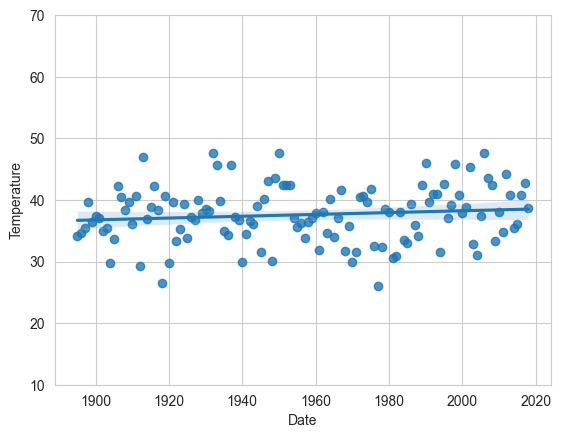

In [1]:
import pandas as pd
from scipy import stats

df_la = pd.read_csv('ave_hi_la_jan_1895-2018.csv')


print(f"\tLos Angeles Average January High Temperatures for 1885 through 2018:")
print("Head:\n", df_la.head())
print("\nTail:\n", df_la.tail())

# Cleaning the Data
df_la.columns = ['Date', 'Temperature', 'Anomaly']

df_la.Date = df_la.Date.floordiv(100)

print("\n\tCleaning the Date")
print(df_la.head(3))

pd.set_option('display.precision', 2)

print("\n\tCalculating Basic Descriptive Statistics for the Dataset")
print(df_la.Temperature.describe())
import seaborn as sns

print("\n\n\tPlotting the Average High Temperatures and a Regression Line")
sns.set_style('whitegrid')

axes = sns.regplot(x=df_la.Date, y=df_la.Temperature)

axes.set_ylim(10, 70)

	New York January High Temperatures for 1885 through 2018:
Head:
      Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0

Tail:
        Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3

	Calculating Basic Descriptive Statistics for the Dataset
count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64


	Plotting the Average High Temperatures and a Regression Line


(10.0, 70.0)

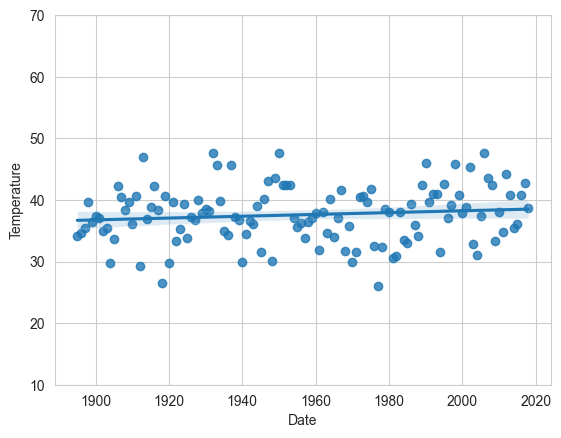

In [3]:

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

print(f"\tNew York January High Temperatures for 1885 through 2018:")
print("Head:\n", nyc.head())
print("\nTail:\n", nyc.tail())

# Cleaning the Data
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)

pd.set_option('display.precision', 2)

print("\n\tCalculating Basic Descriptive Statistics for the Dataset")
print(nyc.Temperature.describe())
import seaborn as sns

print("\n\n\tPlotting the Average High Temperatures and a Regression Line")
sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70)

##### **Answer:**
##### &emsp; Both data sets are the same!.

10. 19 (***Card Class with Overloaded Comparison Operators)*** Modify class *Card* to support the comparison operators, so you can determine whether one Card is less than, equal to or greater than another. Investigate the *functools* module's *total_ordering* decorator. If your class is preceded by @total_ordering and defines methods *\_\_eq\_\_* and *\_\_lt\_\_* (for the *<* operator), the remaining comparison methods for *<=*, *>* and *>=* are autogenerated.

In [1]:
from functools import total_ordering

@total_ordering
class Card:
    """Card class that represents a playing card and its image file name."""
    
    FACES = ['Ace', '2', '3', '4', '5', '6',
             '7', '8', '9', '10', 'Jack', 'Queen', 'King']
    SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']

    def __init__(self, face, suit):
        """Initialize a Card with a face and suit."""
        self._face = face
        self._suit = suit

    @property
    def face(self):
        """Return the Card's self._face value."""
        return self._face

    @property
    def suit(self):
        """Return the Card's self._suit value."""
        return self._suit

    @property
    def image_name(self):
        """Return the Card's image file name."""
        return str(self).replace(' ', '_') + '.png'
    
    def __eq__(self, card) -> bool:
        """Check if both cards are the same"""
        return (self.face == card.face ) and (self.suit == card.suit)
    
    def __lt__(self, card):
        """Check if the left card is smaller than the right card"""
        return self.face < card.face
    
    def __repr__(self):
        """Return string representation for repr()."""
        return f"Card(face='{self.face}', suit='{self.suit}')"     

    def __str__(self):
        """Return string representation for str()."""
        return f'{self.face} of {self.suit}'

    def __format__(self, format):
        """Return formatted string representation."""
        return f'{str(self):{format}}'
    
    
card1 = Card(face='Ace', suit='Spades')
card2 = Card(face='king', suit='Diamonds')


for operators ,symbols in zip('< <= > >=  ==  !='.split(), 
                              '\u003C \u2264 \u003E \u2265 \u003D \u2260'.split()):
    
    print(f"{card1} {symbols:^4} {card2}: ", eval(f'card1 {operators} card2'))

Ace of Spades  <   king of Diamonds:  True
Ace of Spades  ≤   king of Diamonds:  True
Ace of Spades  >   king of Diamonds:  False
Ace of Spades  ≥   king of Diamonds:  False
Ace of Spades  =   king of Diamonds:  False
Ace of Spades  ≠   king of Diamonds:  True


10. 20 ***(Enumerations)*** Many programming languages provide a language element called an enumeration for creating sets of named constants. Often, these are used to make code more readable. The Python Standard Library's *enum* module enables you to emulate this concept by creating subclasses of the *Enum* base class. Investigate the *enum* module's capabilities, then create subclasses of *Enum* that represent card faces and card suits. Modify class *Card* to use these to represent the face and suit as *enum* constants rather than as strings.

In [2]:
#Exercise 10.20 : Enumerations

from enum import Enum
import random

class Card():
    """Card class that represents a playing card and its image file name."""
    
    class Const(Enum):
                
        FACES = ['Ace', '2', '3', '4', '5', '6',
                '7', '8', '9', '10', 'Jack', 'Queen', 'King']
        
        SUITS = ['Hearts', 'Diamonds', 'Clubs', 'Spades']
            
    FACES = Const.FACES.value
    
    SUITS = Const.SUITS.value

    def __init__(self, face, suit):
        """Initialize a Card with a face and suit."""
        self._face = face
        self._suit = suit

    @property
    def face(self):
        """Return the Card's self._face value."""
        return self._face

    @property
    def suit(self):
        """Return the Card's self._suit value."""
        return self._suit

    @property
    def image_name(self):
        """Return the Card's image file name."""
        return str(self).replace(' ', '_') + '.png'

    def __repr__(self):
        """Return string representation for repr()."""
        return f"Card(face='{self.face}', suit='{self.suit}')"     

    def __str__(self):
        """Return string representation for str()."""
        return f'{self.face} of {self.suit}'

    def __format__(self, format):
        """Return formatted string representation."""
        return f'{str(self):{format}}'


class DeckOfCards:
    NUMBER_OF_CARDS = 52  # constant number of Cards

    def __init__(self):
        """Initialize the deck."""
        self._current_card = 0
        self._deck = []

        for count in range(DeckOfCards.NUMBER_OF_CARDS):  
            self._deck.append(Card(Card.FACES[count % 13], 
                Card.SUITS[count // 13]))

    def shuffle(self):
        """Shuffle deck."""
        self._current_card = 0
        random.shuffle(self._deck)    

    def deal_card(self):
        """Return one Card."""
        try:
            card = self._deck[self._current_card]
            self._current_card += 1
            return card
        except:
            return None  

    def __str__(self):
        """Return a string representation of the current _deck."""
        s = ''

        for index, card in enumerate(self._deck):
            s += f'{self._deck[index]:<19}'
            if (index + 1) % 4 == 0:
                s += '\n'
        
        return s

deck = DeckOfCards()

print(deck)

Ace of Hearts      2 of Hearts        3 of Hearts        4 of Hearts        
5 of Hearts        6 of Hearts        7 of Hearts        8 of Hearts        
9 of Hearts        10 of Hearts       Jack of Hearts     Queen of Hearts    
King of Hearts     Ace of Diamonds    2 of Diamonds      3 of Diamonds      
4 of Diamonds      5 of Diamonds      6 of Diamonds      7 of Diamonds      
8 of Diamonds      9 of Diamonds      10 of Diamonds     Jack of Diamonds   
Queen of Diamonds  King of Diamonds   Ace of Clubs       2 of Clubs         
3 of Clubs         4 of Clubs         5 of Clubs         6 of Clubs         
7 of Clubs         8 of Clubs         9 of Clubs         10 of Clubs        
Jack of Clubs      Queen of Clubs     King of Clubs      Ace of Spades      
2 of Spades        3 of Spades        4 of Spades        5 of Spades        
6 of Spades        7 of Spades        8 of Spades        9 of Spades        
10 of Spades       Jack of Spades     Queen of Spades    King of Spades     

10. 21 ***(Software Engineering with Abstract Classes and Abstract Methods)*** When we
think of a class, we assume that programs use it to create objects. Sometimes, it's useful to
declare classes for which you *never* instantiate objects, because in some way they are *incomplete*. As you'll see, such classes can help you engineer effective inheritance hierarchies.

&emsp; &emsp;  **Concrete Classes**-—Consider Section 10.7's *Shape* hierarchy. If *Circle*, *Square* and *Triangle* objects all have *draw* methods, its reasonable to expect that calling *draw* on a *Circle* will display a *Circle*, calling *draw* on a *Square* will display a *Square* and calling *draw* on a *Triangle* will display a *Triangle*. Objects of each class know all the details of the specific shapes to draw. Classes that provide (or inherit) implementations of *every*
method they define and that can be used to create objects are called `concrete classes.`

&emsp; &emsp; ***Abstract Classes***—Now, let's consider class *TwoDimensionalShape* in the *Shape* hier-
archy's second level. If we were to create a *TwoDimensionalShape* object and call its *draw*
method, class *TwoDimensionalShape* knows that all two-dimensional shapes are *drawable*,
but it does *not* know what *specific* two-dimensional shape to draw—there are many! So it
does not make sense for *TwoDimensionalShape* to fully implement a *draw* method. A
method that is defined in a given class, but for which you cannot provide an implementa-
tion is called an `abstract method.` Any class with an abstract method has a "hole"—the
incomplete method implementation—and is called an `abstract class`. *TypeErrors* occur
when you try to create objects of abstract classes. In the *Shape* hierarchy, classes *Shape*,
*TwoDimensionalShape* and *ThreeDimensionalShape* all are abstract classes. They all know
that shapes should be *drawable*, but do not know *what specific shape to draw*. Abstract base
classes are *too general* to create real objects.

&emsp; &emsp; **Inheriting a Common Design**—An abstract class's purpose is to provide a *base class*
from which subclasses can *inherit a common design*, such as a specific set of attributes and
methods. So, such classes often are called `abstract base classes.` In the *Shape* hierarchy,
subclasses inherit from the abstract base class *Shape* the notion of what it means to be a
*Shape*—that is, common properties, such as *location* and *color*, and common behaviors,
such as *draw*, *move* and *resize*.

&emsp; &emsp; **Polymorphic Employee Payroll System**—Now, let's develop an *Employee* class hierarchy that begins with an abstract class, then use polymorphism to perform payroll calculations for objects of two concrete subclasses. Consider the following problem statement:

- *A company pays its employees weekly. The employees are of two types. Salaried employees are paid a fixed weekly salary regardless of the number of hours worked. Hourly employees are paid by the hour and receive overtime pay (1.5 times their hourly salary rate) for all hours worked in excess of 40 hours. The company wants to implement an app that performs its payroll calculations polymorphically*


&emsp; &emsp; **Abstract Base Class Employee**—The Python Standard Library's `abc (abstract base class) module` helps you define abstract classes by inheriting from the module's `ABC class.` Your abstract base class *Employee* class should declare the methods and properties that all employees should have. Each employee, regardless of the way his or her earnings are calculated, has a first name, a last name and a Social Security number. Also, every employee should have an *earnings* method, but the *specific* calculation depends on the employee's type, so you'll make *earnings* an abstract method that the subclasses must override. Your *Employee* class should contain:

- An *\_\_init\_\_* method that initializes the first name, last name and Social Security number data attributes.

- Read-only properties for the first name, last name and Social Security number data attributes.

- An abstract method *earnings* preceded by the abc module's `@abstractmethod` decorator. Concrete subclasses *must* implement this method. The Python documentation says you should raise a *NotImplementedError* in abstract methods.

- A *\_\_repr\_\_* method that returns a string containing the first name, last name and Social Security number of the employee.

&emsp; &emsp; **Concrete Subclass SalariedEmployee**—This *Employee* subclass should override
*earnings* to return a *SalariedEmployee's* weekly salary. The class also should include:

- An *\_\_init\_\_* method that initializes the first name, last name, Social Security number and weekly salary data attributes. The first three of these should be initialized by calling base class *Employee's* *\_\_init\_\_* method.

- A read-write *weekly_salary* property in which the *setter* ensures that the property is always non-negative.

- A *\_\_repr\_\_* method that returns a string starting with *'SalariedEmployee:'* and followed by all the information about a *SalariedEmployee*. This overridden method should call *Employee's* version.

&emsp; &emsp; **Concrete Subclass HourlyEmployee**—This *Employee* subclass should override *earnings* to return an *HourlyEmployee's* earnings, based on the hours worked and wage per hour. The class also should include:

- An \_\_init\_\_ method to initialize the first name, last name, Social Security number, hours and wages data attributes. The first name, last name and Social Security number should be initialized by calling base class *Employee's* *\_\_init\_\_* method.

- Read-write *hours* and *wages* properties in which the *setters* ensure that the hours are in range (0–168) and wage per hour is always non-negative.

- A *\_\_repr\_\_* method that returns a string starting with *'HourlyEmployee:'* and followed by all the information about a *HourlyEmployee*. This overridden method should call *Employee's* version.

&emsp; &emsp; **Testing Your Classes**—In an IPython session, test your hierarchy:

- Import the classes *Employee*, *SalariedEmployee* and *HourlyEmployee*.

- Attempt to create an *Employee* object to see the *TypeError* that occurs and prove that you cannot create an object of an abstract class.

- Assign objects of the concrete classes *SalariedEmployee* and *HourlyEmployee* to variables, then display each employee’s string representation and earnings.

- Place the objects into a list, then iterate through the list and polymorphically process each object, displaying its string representation and earnings.

In [7]:

#Exercise 10.21: Software Engineering with Abstract Classes and Abstract Methods
from abc import ABCMeta, abstractmethod
from decimal import Decimal

#Abstract Class
class Employee(metaclass = ABCMeta):
    """Employee base Class"""
    
    def __init__(self, first_name: str, last_name: str, snn: str) -> None:
        """Initialise Employee Attributes
        
        >>> Employee('Sue', 'Jones', '333-33-3333')
        Traceback (most recent call last):
            ...
        TypeError: Can't instantiate abstract class Employee with abstract method earnings
        """
        self.__FIRST_NAME = first_name
        self.__LAST_NAME = last_name
        self.__SNN = snn
        
    @property 
    def first_name(self) -> str: return self.__FIRST_NAME
    
    @property
    def last_name(self) -> str:  return self.__LAST_NAME
    
    @property 
    def snn(self) -> str:  return self.__SNN
    
    
    @abstractmethod
    def earnings(self):
        raise NotImplementedError('Subclasses should implement this')
    
    
    def __repr__(self) -> str:
        """Return string representation for repr()."""
        return (f"{self.first_name} {self.last_name}\n"
                f"Social Security Number: {self.snn}")
        


#Subclass: SalariedEmployee
class SalariedEmployee(Employee):
    """Class representing an employee who gets paid a weekly salary."""

    def __init__(self, first_name: str, last_name: str,
                 ssn: str, weekly_salary: Decimal):
        """Initialize SalariedEmployee attributes.
        
            SalariedEmployee(First Name, Last Name, Social Security Number, Weekly Salary)
            
        >>> employee = SalariedEmployee('Sue', 'Jones', '333-33-3333', Decimal('4166.5'))
        >>> employee.first_name
        'Sue'
        >>> employee.last_name 
        'Jones'
        >>> employee.snn
        '333-33-3333'
        """
        super().__init__(first_name, last_name, ssn) 
        self.weekly_salary = weekly_salary

    @property
    def weekly_salary(self) -> Decimal: 
        """Return and Set weekly salary 
        
        >>> employee = SalariedEmployee('Sue', 'Jones', '333-33-3333', Decimal('4166.5'))
        >>> employee.weekly_salary
        Decimal('4166.5')
        
        >>> employee.weekly_salary = Decimal('4666.5')
        >>> employee.weekly_salary
        Decimal('4666.5')
       
        Attempting to set an Invalid Value
        >>> employee.weekly_salary = Decimal('-4666.5')
        Traceback (most recent call last): 
            ...
        ValueError: salary worked must be >= 0.0
        """
        return self.__WEEKLY_SALARY

    @weekly_salary.setter
    def weekly_salary(self, salary) -> None:
        """Set weekly salary or raise ValueError if invalid."""
        if salary < Decimal('0.0'):
            raise ValueError('salary worked must be >= 0.0')
        
        self.__WEEKLY_SALARY = salary
    
    def earnings(self) -> Decimal:
        """Calculate earnings.
        
        >>> employee = SalariedEmployee('Sue', 'Jones', '333-33-3333', Decimal('4166.5'))
        >>> employee.earnings()
        Decimal('4166.5')
        """
        return self.weekly_salary

    def __repr__(self) -> str:
        """Return string representation for repr().
        
        >>> employee = SalariedEmployee('Sue', 'Jones', '333-33-3333', Decimal('4166.5'))
        >>> employee
        SalariedEmployee: Sue Jones
        Social Security Number: 333-33-3333
        weekly salary: 4166.50
        """
        return ("SalariedEmployee: " + super().__repr__() + 
                f"\nweekly salary: {self.weekly_salary:.2f}")
        
   
        
#Subclass: HourlyEmployee
class HourlyEmployee(Employee):
    """Class representing an employee who is paid based on hours worked and hourly wage"""
    
    def __init__(self, first_name: str, last_name: str, snn: str, 
                 hours_worked: int,  hours_wage:Decimal) -> None:
        
        """Initialize HourlyEmployee attributes.
        
                
            HourlyEmployee(First Name, Last Name, 
                                Social Security Number, Hours Worked, Hours wage)
            
        >>> employee = HourlyEmployee('Sue', 'Jones', '333-33-3333', 8, Decimal('104.1625'))
        >>> employee.first_name
        'Sue'
        >>> employee.last_name 
        'Jones'
        >>> employee.snn
        '333-33-3333'
        """
        
        super().__init__(first_name, last_name, snn)
        
        self.hours = hours_worked
        self.wages = hours_wage
        
    @property
    def hours(self) -> int: 
        """Returns and Set Hours Worked
        
        >>> employee = HourlyEmployee('Sue', 'Jones', '333-33-3333', 8, Decimal('104.1625'))
        >>> employee.hours
        8
    
        >>> employee.hours = 6
        >>> employee.hours
        6
        
        Attempting to set an Invalid Value
        >>> employee.hours = 169
        Traceback (most recent call last):
            ...
        ValueError: hours worked must be within the range (0-168)
        """
        return self.__HOURS
    
    @hours.setter
    def hours(self, hours_worked: int) -> None:
        """Set hours worked"""
        if not (0 <= hours_worked <= 168):
            raise ValueError('hours worked must be within the range (0-168)')
        
        self.__HOURS = hours_worked
        
    @property
    def wages(self) -> Decimal: 
        """Return and Set the wage
        
        >>> employee = HourlyEmployee('Sue', 'Jones', '333-33-3333', 8, Decimal('104.1625'))
        >>> employee.wages
        Decimal('104.1625')
            
        >>> employee.wages = Decimal('106.1625')
        >>> employee.wages
        Decimal('106.1625')
        
        Attempting to set an Invalid Value
        >>> employee.wages = Decimal('-104.1625')
        Traceback (most recent call last):
            ...
        ValueError: Wages can't be negative
        """
        
        return self.__WAGES
    
    @wages.setter
    def wages(self, wage: Decimal) -> None:
        """Sets the hourly wage"""
        
        if wage < Decimal('0.0'):
            raise ValueError('Wages can\'t be negative')
    
        self.__WAGES = wage
        
    def earnings(self) -> Decimal:
        """Calculate earnings.
        
        >>> employee = HourlyEmployee('Sue', 'Jones', '333-33-3333', 8, Decimal('104.1625'))
        >>> employee.earnings()
        Decimal('833.3000')
        """
        return self.hours * self.wages
    
    def __repr__(self) -> str:
        """Return string representation for repr().
        
        >>> employee = HourlyEmployee('Sue', 'Jones', '333-33-3333', 8, Decimal('104.1625'))
        >>> employee
        HourlyEmployee: Sue Jones
        Social Security Number: 333-33-3333
        Hours Worked: 8
        Hourly wage: 104.1625
        """
        return ("HourlyEmployee: " + super().__repr__() +
                f"\nHours Worked: {self.hours}"
                f"\nHourly wage: {self.wages}")
    
    

#Testing the Classes
if __name__ == '__main__':
    
    import doctest
    doctest.testmod()
    
    employee1 = HourlyEmployee('Sue', 'Jones', '333-33-3333', 8, Decimal('104.1625'))
    employee2 =  SalariedEmployee('Marco', 'Blue', '999-33-6666', Decimal('4166.5'))
    
    
    for employees in (employee1, employee2):
        
        print(employees)
        print("earnings: ", employees.earnings())
        print()

HourlyEmployee: Sue Jones
Social Security Number: 333-33-3333
Hours Worked: 8
Hourly wage: 104.1625
earnings:  833.3000

SalariedEmployee: Marco Blue
Social Security Number: 999-33-6666
weekly salary: 4166.50
earnings:  4166.5

